# EDA PROJECT TUTORIAL

### IMPORTS

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import missingno as msno
import sweetviz as sv
from pickle import dump

import warnings
warnings.filterwarnings("ignore")


c:\Users\User\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


### DATA ACQUISITION: collecting the raw data

In [2]:
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")

### EXPLORING THE RAW DATA

In [3]:
raw= df.copy()
raw.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### UNDERSTANDING THE FEATURES

The dataset we are working with shows information about property rentals listed on Airbnb.
In the following EDA, the question we want to answer is simple: 'How/Which property attributes affect the prices?'

I will first study which advertisement elements are irrelevant for predicting our target, which is the price.

'id': unique identifier, doesn't bring relevant information.

'name': title of the ad, not relevant.

'host_id': same as 'id', not relevant.

'host_name': not related to the price.

A better location usually means an increase of the prices so everything related to location is important:

'neighbourhood_group': relevant

'neighbourhood': relevant

'latitude': relevant

'longitude': relevant

'room_type': the price will vary depending on how big the rental surface is.

The following columns will be dropped because none of them are direct price modifiers.

'minimum_nights'

'number_of_reviews'

'last_review'

'reviews_per_month'

'calculated_host_listings_count'

'availability_365'

'price': TARGET

In [4]:
drops= ['id','name','host_id','host_name','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

### INITIAL EXPLORING

In [5]:
raw.shape

(48895, 16)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
eda_df= raw.drop(columns= drops)
eda_df.head(15)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150


### SEARCHING FOR DUPLICATES AND NULL VALUES

In [8]:
eda_df.isna().sum()

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

In [9]:
eda_df.duplicated().sum()

np.int64(2)

In [10]:
eda_df[eda_df.duplicated(keep=False)]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
12251,Manhattan,East Village,40.72145,-73.97881,Private room,75
37105,Manhattan,East Village,40.72145,-73.97881,Private room,75
48391,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170
48887,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170


In [11]:
raw.duplicated().sum()

np.int64(0)

In [12]:
raw.loc[[12251, 37105, 48391, 48887]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12251,9484892,"Cozy, E.Vill room w/ private bath!",13667539,Brian,Manhattan,East Village,40.72145,-73.97881,Private room,75,1,2,2016-01-01,0.05,1,0
37105,29501807,Sunny room with new Queen bed and large closet,77813945,Andrew,Manhattan,East Village,40.72145,-73.97881,Private room,75,4,5,2019-05-26,1.90,1,33
48391,36235150,Sky View beautiful apt in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,1,2019-07-07,1.00,3,340
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365


We can observe that no missing values were found. It seemed to exist 2 duplicates which in fact are different properties as seen in the raw df. That means I won't drop the duplicates.

### Univariate analysis

In [13]:
eda_df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

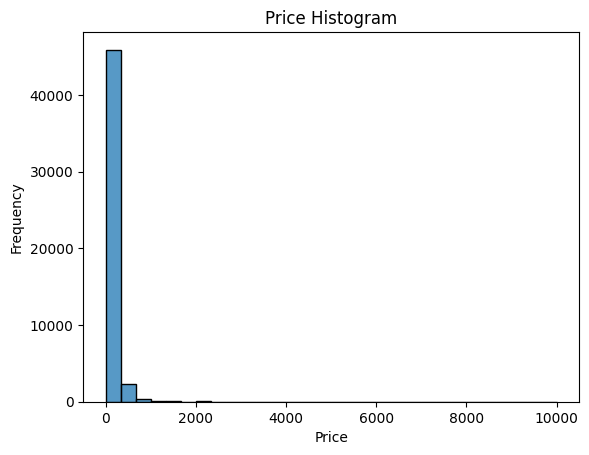

In [18]:
sns.histplot(eda_df['price'], bins=30)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

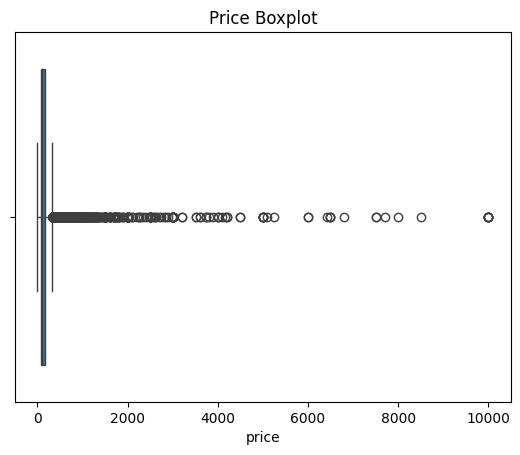

In [19]:
sns.boxplot(x=eda_df['price'])
plt.title('Price Boxplot')
plt.show()